# Дипломная работа

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statistics

# 1. Загрузить файл hr.csv.

In [128]:
data = pd.read_csv('data/HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [129]:
#Проверим есть ли пропущенные значения
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# 2. Рассчитать основные статистики для переменных

In [130]:
# (среднее,медиана,мода,мин/макс,сред.отклонение)
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

Что видно из матрицы корреляций:
* количество проектов сильно коррелирует с количеством средних часов и с последней аттестацией
* время трудоустройства в компании имеет отрицательную взимаосвязь с уровнем удовлетворенности от работы
* также данные об аттестации имеют положительную корреляцию с уровнем удовлетворенности от работы

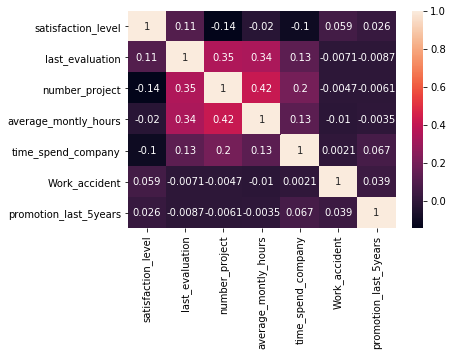

In [132]:
corr_data=data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident',
'promotion_last_5years']].corr()
sns.heatmap(corr_data,annot=True)

# 4. Визуализировать несколько взаимосвязей между переменными.

Посмотрим, прослеживается ли четкая связь между некоторыми переменными

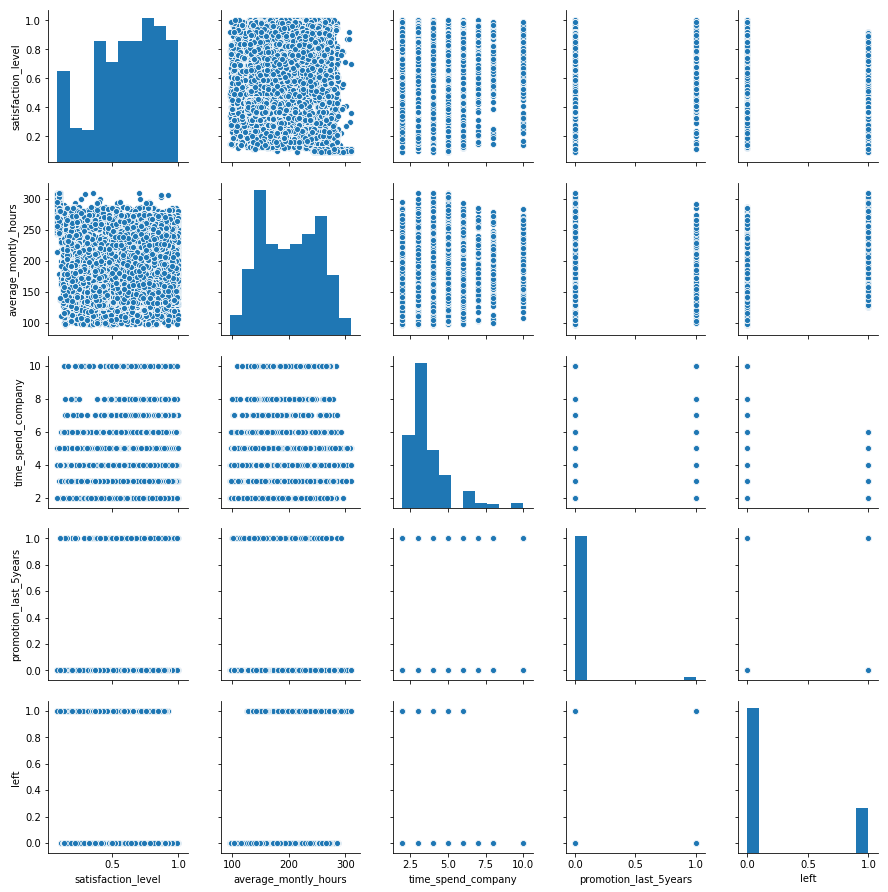

In [45]:
pairplot_data=data[['satisfaction_level','average_montly_hours','time_spend_company', 'promotion_last_5years','left']]
sns.pairplot(pairplot_data)

Не особо, что понятно..Попробуем разделить данные на тех, кто ушел, и тех кто остался. И проверим, есть ли четкие зависимости для группы людей, которые ушли из компании

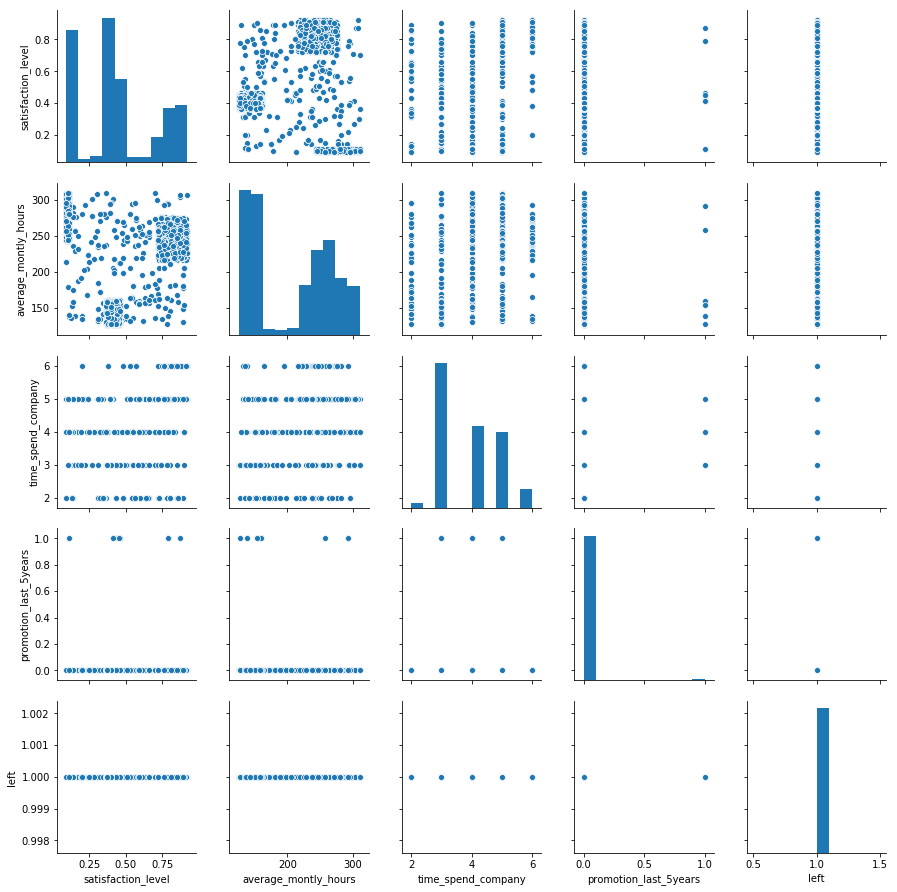

In [46]:
sns.pairplot(pairplot_data[pairplot_data['left']==1])

Что-то интересное есть с переменной "Среднее количество рабочих часов". Посмотрим более внимательно на уровень удовлетворенности от работы и тем, сколько часов работает человек

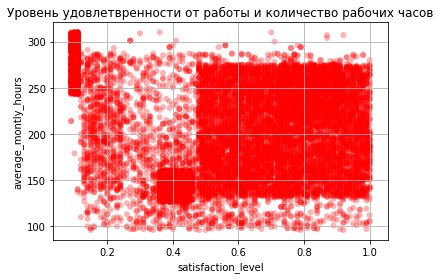

In [133]:
fig, ax = plt.subplots()
ax.scatter(data['satisfaction_level'], data['average_montly_hours'], c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.title('Уровень удовлетвренности от работы и количество рабочих часов')
plt.show()

Довольно четко видно, что при очень высоких рабочих часах (более 250) уровень удовлетворенности самый низкий!

А теперь посмотрим на ту же взаимосвязь, но только для группы людей, которые покинули компанию

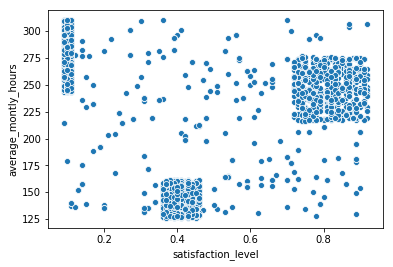

In [135]:
sns.scatterplot(x='satisfaction_level',y='average_montly_hours',data=data[data['left']==1])

Видно три четких кластера: при очень большом объеме рабочих часов (более 250) и при очень низком (менее 160) удовлетворение от работы значительно ниже, чем в среднем по выборке

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Продолжим исследовать переменные из прошлого блока: влияет ли количество рабочих часов на факт увольнения сотрудника

In [137]:
# Двухвыборочный t-критерий для независимых выборок
left = data[data['left']==1] 
working = data[data['left']==0] 

Наша нулевая гипотеза в том, что среднее количество рабочих часов в группе "уволился" и "остался" одинаково и различия статистически не значимы

In [138]:
print(stats.ttest_ind(left['average_montly_hours'], working['average_montly_hours']))

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)


Так как результат p-value меньше 0.05 и показатель t-statistic больше порогового значения, то мы отвергаем нулевую гипотезу о том, что нет различий у двух групп

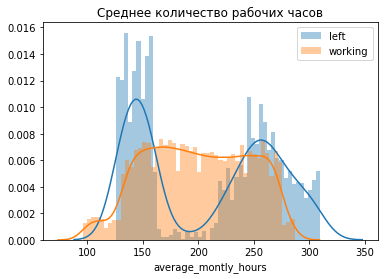

In [139]:
sns.distplot(left['average_montly_hours'], 50)
sns.distplot(working['average_montly_hours'], 50)
plt.title('Среднее количество рабочих часов')
plt.legend(['left', 'working'])
plt.show()

Интересно, что среди тех, кто ушел, есть 2 пиковых значения, они либо работали слишком мало, либо слишком много, что также подтверждают данные о взаимосвязи уровня удовлетворения от работы и количества рабочих часов. Среди тех кто остается, рабочие часы распределяются равномерно

# 6. Рассчитать сколько работников работает в каждом департаменте.

Посмотрим более внимательно на разные отделы компании

In [154]:
data.groupby('sales').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


Самые недовольные работой оказались отдель HR и бухгалетера, а больше всего удовлетворения от работы получают работники менеджмента

Посмотрим сколько человек работает в каждом отделе

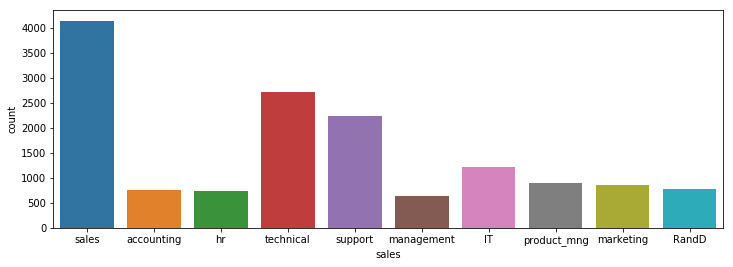

In [165]:
fig = plt.figure(figsize=(12,4))
sns.countplot(x='sales',data=data)
plt.show()

Больше всего сотрудниках в sales и technical 

Интересно будет узнать, сколько человек ушло из каждого департмента  по отдельности

In [166]:
#values можно взять любую переменную, т.к. пропущенных значений у нас нет, а функция count не повлияет на результат. 
data.pivot_table(index=['sales'], columns='left', aggfunc='count', values='Work_accident', margins =True)

left,0,1,All
sales,,,
IT,954,273,1227
RandD,666,121,787
accounting,563,204,767
hr,524,215,739
management,539,91,630
marketing,655,203,858
product_mng,704,198,902
sales,3126,1014,4140
support,1674,555,2229


Так же самая инорфмация, но в графическом виде

<Figure size 576x720 with 0 Axes>

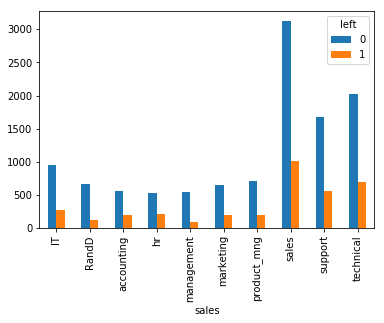

In [168]:
fig = plt.figure(figsize=(8,10))
pd.crosstab(data.sales,data.left).plot(kind='bar')
plt.show()

# 7. Показать распределение сотрудников по зарплатам.

На графике видно, что работников с низкой зарплатой больше всего, но они не сильно отличаются от количества людей со стредней зарплатой. 

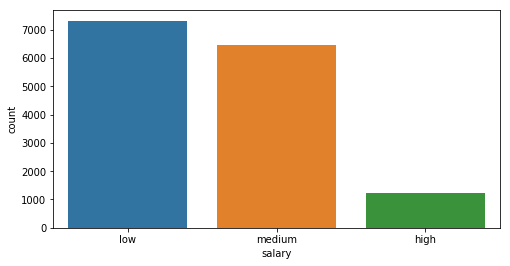

In [151]:
fig = plt.figure(figsize=(8,4))              
sns.countplot(x="salary",data=data)
plt.show()

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

Самое большое количество людей с маленькими зарплаты трудоустроены в продажах. Примечательно что в менджменте у сотрудников равномерное распределение зарплат

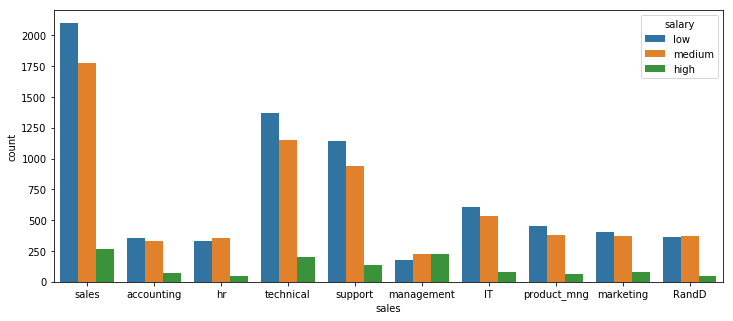

In [169]:
plt.figure(figsize=(12,5))
sns.countplot(x="sales",hue="salary",data=data)

# 9. Сколько сотрудников покинули компанию.

In [170]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

3571 сотрудника покинули компанию

# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Первая мысль, что зарплата должна влиять на решение сотрудника уйти. Посмотрим сначала графически:

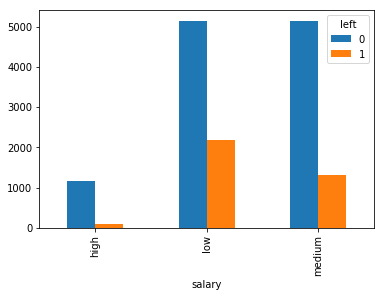

In [171]:
pd.crosstab( data.salary, data.left ).plot( kind='bar' )

Из всего предыдущего анализа я возьму несколько переменных, которые могут влиять на решение человека:
* Satisfaction Level
* Average Monthly Hours
* Promotion Last 5 Years
* Salary

In [177]:
subdf = data[ [ 'satisfaction_level','average_montly_hours','promotion_last_5years','salary' ] ]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Так как данные о зарплате даны в текстовом виде, нужно перевести их в дамми-переменные 

In [197]:
salary = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary],axis='columns')
df = df_with_dummies.drop(columns = ['salary'])
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

В качестве зависимой переменной возьмем значения 0 и 1, в зависимости от того, ушел человек из компании или нет. И построим несколько моделей

In [216]:
X = df
y = data.left
# разделим данные на тестовые и тренировочные 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print("Размерность тренировочного сета X = ",X_train.shape)
print("Размерность тестового сета X = ",X_test.shape)

Размерность тренировочного сета X =  (11999, 6)
Размерность тестового сета X =  (3000, 6)


### Логистическая регрессия 

In [217]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#log_pred = logreg.predict( X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Метод ближайших соседей

In [218]:
knn = KNeighborsClassifier()
knn.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Decision Tree Classifier

In [219]:
tree=DecisionTreeClassifier()
tree.fit(X_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [220]:
print("DT:", tree.score(X_test,y_test))
print("Logr:", logreg.score(X_test,y_test))
print("KNN:",knn.score(X_test,y_test))

DT: 0.9926666666666667
Logr: 0.775
KNN: 0.89


Лучше всего наши данные объясняют Decision Tree Classifier, но есть подозрения, что результат over-fitted.

Из проведенных регрессий можно сделать вывод, что выбранные переменные 
* satisfaction_level
* average_montly_hours
* promotion_last_5years
* salary

как минимум на 90 процентов объясняют решение человека уйти из компании